In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('mex.csv') 

In [4]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26281 non-null  int64  
 1   source                                        26281 non-null  object 
 2   name                                          26281 non-null  object 
 3   host_since                                    26278 non-null  object 
 4   host_location                                 20888 non-null  object 
 5   host_response_time                            23109 non-null  object 
 6   host_response_rate                            23109 non-null  object 
 7   host_acceptance_rate                          23508 non-null  object 
 8   host_is_superhost                             24899 non-null  object 
 9   host_neighbourhood                            13792 non-null 

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                          0
source                                              0
name                                                0
host_since                                          3
host_location                                    5393
host_response_time                               3172
host_response_rate                               3172
host_acceptance_rate                             2773
host_is_superhost                                1382
host_neighbourhood                              12489
host_listings_count                                 3
host_total_listings_count                           3
host_identity_verified                              3
neighbourhood                                   11171
neighbourhood_cleansed                              0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [6]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 
data1 =data.fillna(method="ffill") 

/var/folders/g2/ww78rm_s75z1d2tynldmz1_m0000gn/T/ipykernel_7418/3829910909.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 =data.fillna(method="bfill")
/var/folders/g2/ww78rm_s75z1d2tynldmz1_m0000gn/T/ipykernel_7418/3829910909.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 =data.fillna(method="ffill")


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
host_since                                      0
host_location                                   0
host_response_time                              1
host_response_rate                              1
host_acceptance_rate                            1
host_is_superhost                               0
host_neighbourhood                              1
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0


In [8]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas= data1.iloc[ : , [10,11,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,38,39,40,41,42,43,44,46,47,48,49,50]]
cualitativas= data1.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,21,28,36,37] ]

<Figure size 1500x800 with 0 Axes>

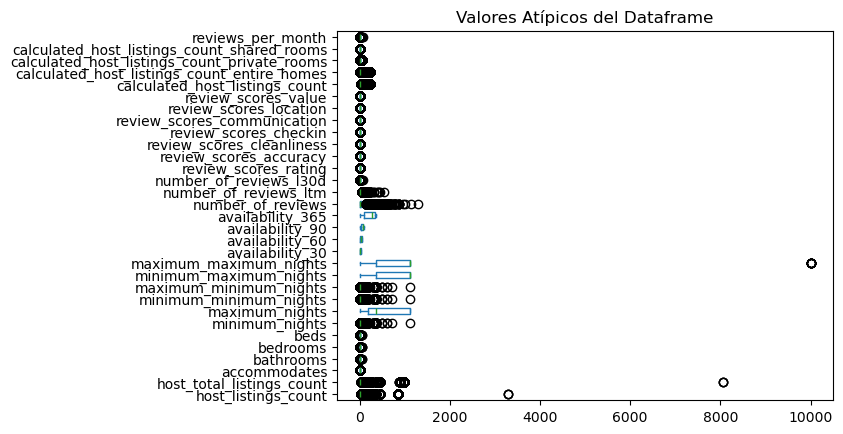

In [9]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [10]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_listings_count                               33.500
host_total_listings_count                         39.500
accommodates                                       7.000
bathrooms                                          3.500
bedrooms                                           3.500
beds                                               3.500
minimum_nights                                     3.500
maximum_nights                                  2542.500
minimum_minimum_nights                             3.500
maximum_minimum_nights                             6.000
minimum_maximum_nights                          2265.000
maximum_maximum_nights                          2265.000
availability_30                                   62.000
availability_60                                  116.500
availability_90                                  167.500
availability_365                                 739.000
number_of_reviews                                148.000
numbe

In [11]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN
1,12.0,13.0,NaN,NaN,NaN,NaN,1.0,365,1.0,1.0,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,4.0,4.0,1.0,2.0,2.0,2.0,30,2.0,2.0,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,4.0,2.0,1.0,1.0,1.0,3.0,180,3.0,4.0,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,4.0,2.0,1.0,2.0,1.0,1.0,730,1.0,1.0,...,4.96,4.96,4.98,4.96,4.92,3.0,1.0,2.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,16.0,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,NaN,0.0,1.00
26277,NaN,NaN,3.0,1.0,2.0,2.0,1.0,365,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,8.0,8.0,6.0,2.0,1.0,NaN,3.0,365,3.0,3.0,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,NaN,1.00
26279,NaN,NaN,NaN,3.0,3.0,NaN,1.0,730,1.0,NaN,...,5.00,5.00,5.00,5.00,5.00,NaN,NaN,0.0,0.0,1.00


In [12]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_listings_count                             3521
host_total_listings_count                       3696
accommodates                                    1320
bathrooms                                        689
bedrooms                                         889
beds                                            2730
minimum_nights                                  3523
maximum_nights                                     0
minimum_minimum_nights                          3065
maximum_minimum_nights                          1964
minimum_maximum_nights                             0
maximum_maximum_nights                            12
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                               2177
number_of_reviews_ltm                           1207
number_of_reviews_l30d                        

In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7,1.0,1.0,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,1.50
1,12.0,13.0,3.0,1.4,1.4,1.6,1.0,365,1.0,1.0,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,4.0,4.0,1.0,2.0,2.0,2.0,30,2.0,2.0,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,4.0,2.0,1.0,1.0,1.0,3.0,180,3.0,4.0,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,4.0,2.0,1.0,2.0,1.0,1.0,730,1.0,1.0,...,4.96,4.96,4.98,4.96,4.92,3.0,1.0,2.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,16.0,2.0,1.0,1.0,1.0,1.0,365,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,0.7,0.0,1.00
26277,6.2,7.4,3.0,1.0,2.0,2.0,1.0,365,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,8.0,8.0,6.0,2.0,1.0,1.6,3.0,365,3.0,3.0,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,0.0,1.00
26279,6.2,7.4,3.0,3.0,3.0,1.6,1.0,730,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.0,2.4,0.0,0.0,1.00


In [14]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,Unnamed: 0,source,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,city scrape,Villa Dante,2010-06-28,"Mexico City, Mexico",NaN,NaN,NaN,f,NaN,...,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,1.50
1,1,city scrape,Condesa Haus,2010-08-09,"Mexico City, Mexico",within an hour,92%,92%,t,Condesa,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,2,city scrape,"2 bedroom apt. deco bldg, Condesa",2011-01-04,"Mexico City, Mexico",within a few hours,100%,56%,t,Hipódromo,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3,city scrape,Beautiful light Studio Coyoacan- full equipped !,2010-08-24,"Mexico City, Mexico",within an hour,100%,94%,t,Coyoacán,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,4,previous scrape,MARIA DEL ALMA,2011-05-31,"Mexico City, Mexico",within an hour,100%,94%,f,Coyoacán,...,4.96,4.96,4.98,4.96,4.92,3.0,1.0,2.0,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,26276,city scrape,Suite Dumas Polanco 8D,2020-09-26,"Mexico City, Mexico",within an hour,100%,100%,f,Chapultepec Morales,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,0.7,0.0,1.00
26277,26277,city scrape,Departamento amueblado en CDMX,2023-07-13,"Monterrey, Mexico",within an hour,100%,100%,f,Cerritos,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,26278,city scrape,hospedaje en Coyoacán CDMX,2019-09-10,"Mexico City, Mexico",within an hour,100%,92%,f,Coapa,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,0.0,1.00
26279,26279,city scrape,3 recámaras 3 baños con estacionamiento,2015-06-07,"Mexico City, Mexico",within an hour,100%,100%,t,Polanco,...,5.00,5.00,5.00,5.00,5.00,5.0,2.4,0.0,0.0,1.00


In [15]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
host_since                                      0
host_location                                   0
host_response_time                              1
host_response_rate                              1
host_acceptance_rate                            1
host_is_superhost                               0
host_neighbourhood                              1
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
price                                           0
has_availability                                0
first_review                                    1
last_review                                     1
host_listings_count                             0


In [16]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Mex_outliers.csv")